In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import datasets, layers, models
import tensorflow as tf
import numpy as np
import os

In [36]:
train_df = pd.read_csv("train.csv")
train_df.head()
test_df = pd.read_csv("test.csv")
test_df.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000


## Preprocessing


In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

In [38]:
Train_image=train_df.drop('labels',axis ='columns')
Train_label=train_df['labels']    

In [39]:
Train_label.head()

0    0
1    1
2    1
3    0
4    0
Name: labels, dtype: int64

In [40]:
Train_image=Train_image.to_numpy()
Train_label=Train_label.to_numpy()
Train_image_processed=Train_image.reshape(-1,20,20,3)

In [41]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_image_processed ,Train_label,test_size=0.25)

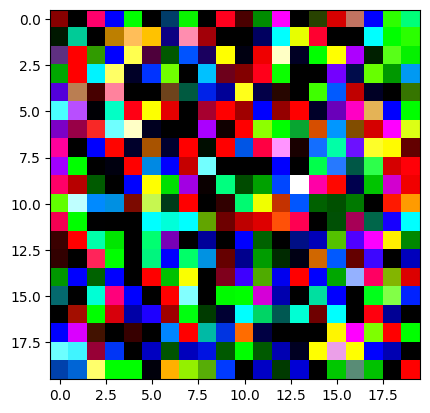

In [42]:
plt.imshow(Xtrain[10])

list_optimzer=['SGD','adam','RMSprop','Adadelta','Adamax']
i=0
j=0.01
while i!=5:
    acc=model_cnn_func(list_optimzer[i])
    print(list_optimzer[i])
    print(acc)
    i=i+1


In [43]:
model_detect = models.Sequential([
        layers.Conv2D(filters=16,kernel_size=(11,11),activation='relu',input_shape=(20,20,3),strides=(2,2),use_bias=True),
        layers.Dropout(0.2),
        layers.MaxPool2D((2,2),padding='same'),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',use_bias=True),
        layers.MaxPool2D((2,2),padding ='same'), 
    
        layers.Flatten(),
        layers.Dense(64,activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L1(l=0.01)),
        layers.Dropout(0.4),
        layers.Dense(32,activation='leaky_relu'),
        layers.Dropout(0.2),
        layers.Dense(16,activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L2(l=0.001)),
        layers.Dropout(0.5),
        layers.Dense(2,activation='softmax')
        ])

opt =tf.keras.optimizers.Adam(learning_rate=0.001)

model_detect.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
    )

model_detect.fit(Xtrain,Ytrain,epochs=10,verbose=2)
accuracy_mod=model_detect.evaluate(Xtest,Ytest)

Epoch 1/10
124/124 - 0s - loss: 2.1547 - accuracy: 0.7572 - 428ms/epoch - 3ms/step
Epoch 2/10
124/124 - 0s - loss: 0.7889 - accuracy: 0.8438 - 179ms/epoch - 1ms/step
Epoch 3/10
124/124 - 0s - loss: 0.4090 - accuracy: 0.8766 - 186ms/epoch - 2ms/step
Epoch 4/10
124/124 - 0s - loss: 0.3232 - accuracy: 0.9032 - 231ms/epoch - 2ms/step
Epoch 5/10
124/124 - 0s - loss: 0.2855 - accuracy: 0.9177 - 207ms/epoch - 2ms/step
Epoch 6/10
124/124 - 0s - loss: 0.2550 - accuracy: 0.9238 - 197ms/epoch - 2ms/step
Epoch 7/10
124/124 - 0s - loss: 0.2291 - accuracy: 0.9383 - 233ms/epoch - 2ms/step
Epoch 8/10
124/124 - 0s - loss: 0.2052 - accuracy: 0.9446 - 188ms/epoch - 2ms/step
Epoch 9/10
124/124 - 0s - loss: 0.1932 - accuracy: 0.9487 - 177ms/epoch - 1ms/step
Epoch 10/10
124/124 - 0s - loss: 0.1800 - accuracy: 0.9520 - 185ms/epoch - 1ms/step
42/42 [==============================] - 0s 739us/step - loss: 0.5049 - accuracy: 0.8248


In [44]:

Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_image_processed,Train_label,test_size=0.25)
model_detect.evaluate(Xtest,Ytest)

42/42 [==============================] - 0s 685us/step - loss: 0.1837 - accuracy: 0.9459


[0.18374335765838623, 0.9459253549575806]

In [45]:
yp=model_detect.predict(Xtest)
yp[:5]

42/42 [==============================] - 0s 580us/step


array([[9.9999332e-01, 6.6174448e-06],
       [9.7461301e-01, 2.5387060e-02],
       [2.0522889e-01, 7.9477113e-01],
       [9.6116710e-01, 3.8832892e-02],
       [9.9999976e-01, 2.7386483e-07]], dtype=float32)

In [46]:
yp=yp.flatten()
yp.shape

(2626,)

In [47]:
y_pred=[]
i=0

while i < len(yp)-1 :
    if yp[i] >yp[i+1]:
        y_pred.append(0)
    else:
        y_pred.append(1)
    i=i+2

In [48]:
y_pred[:20]

[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]

In [49]:
Ytest[:20]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [50]:
from sklearn.metrics import f1_score
f1_score=(Ytest,yp)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Ytest,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       985
           1       0.89      0.89      0.89       328

    accuracy                           0.95      1313
   macro avg       0.93      0.93      0.93      1313
weighted avg       0.95      0.95      0.95      1313



Text(95.72222222222221, 0.5, 'Truth')

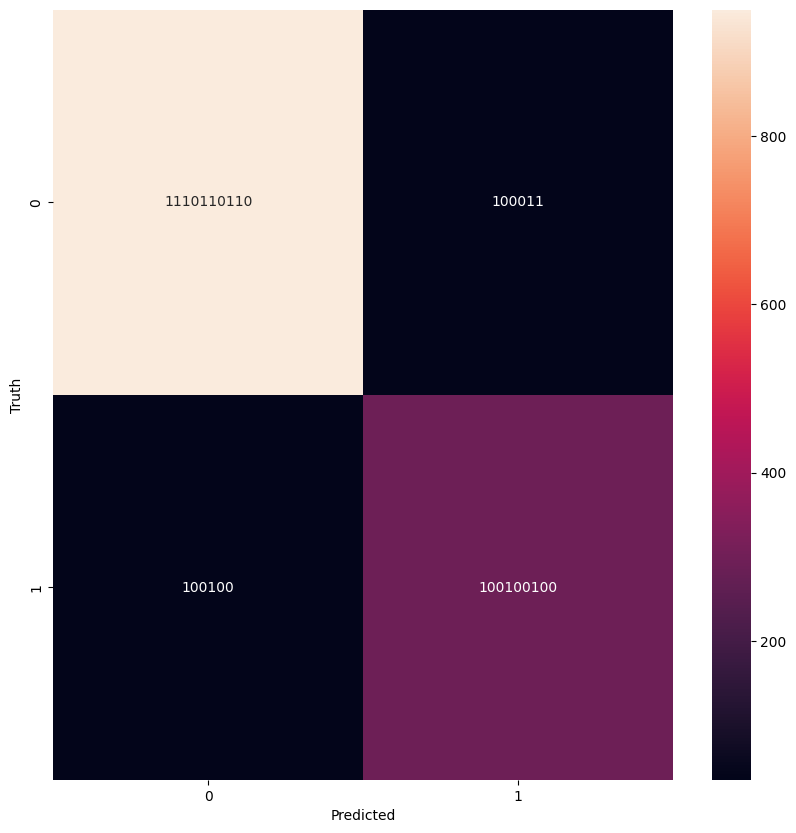

In [52]:
import seaborn as sn
cm =tf.math.confusion_matrix(labels=Ytest,predictions=y_pred)

plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='b')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
test_df_d=test_df.drop('id',axis='columns')
test_df_d

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [54]:
test_df_d=test_df_d.to_numpy()
test_df_reshaped=test_df_d.reshape(-1,20,20,3)

In [55]:
submission_pred=model_detect.predict(test_df_reshaped)

 1/71 [..............................] - ETA: 0s

71/71 [==============================] - 0s 771us/step


In [56]:
sub=np.argmax(submission_pred,axis=1)
sub

array([1, 0, 1, ..., 1, 0, 1])

In [57]:
submission_data=pd.DataFrame({'id':test_df['id'],'Prediciton':sub})

In [58]:
submission_data.to_csv('final_output.csv', index=False)

In [59]:
read_sub=pd.read_csv('final_output.csv')
read_sub

,id,Prediciton
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0
